In [1]:
# Part 1
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import re
from sklearn.feature_extraction.text import TfidfVectorizer

In [2]:
# Load the CSV file (adjust the path if needed)
df = pd.read_csv("rick_n_morty.csv")

In [3]:
print(df.columns)

Index(['Unnamed: 0', 'Season No', 'Episode', 'episode no.', 'speaker',
       'dialouge', 'IMDb score '],
      dtype='object')


In [4]:
# Preprocessing: Aggregate dialogue per episode and calculate word count
episode_dialogue = df.groupby(['Season No', 'episode no.'])['dialouge'].apply(' '.join).reset_index()
episode_scores = df[['Season No', 'episode no.', 'IMDb score ']].drop_duplicates()
episode_data = pd.merge(episode_dialogue, episode_scores, on=['Season No', 'episode no.'], how='left')


In [5]:
# Calculate word count
episode_data['word_count'] = episode_data['dialouge'].apply(lambda x: len(re.findall(r'\w+', x)))


In [6]:
# Feature extraction using TF-IDF
vectorizer = TfidfVectorizer(max_features=1000)  # Limit to top 1000 words
tfidf_matrix = vectorizer.fit_transform(episode_data['dialouge'])
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=vectorizer.get_feature_names_out())
episode_data = pd.concat([episode_data, tfidf_df], axis=1)

In [7]:
# Prepare features and target
features = episode_data.drop(['Season No', 'episode no.', 'dialouge', 'IMDb score '], axis=1)
target = episode_data['IMDb score ']

In [8]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)


In [9]:
# Linear Regression
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
linear_predictions = linear_model.predict(X_test)

In [10]:
# Random Forest Regression
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test)

In [11]:
# Gradient Boosting Regression
gb_model = GradientBoostingRegressor(random_state=42)
gb_model.fit(X_train, y_train)
gb_predictions = gb_model.predict(X_test)

In [12]:
# Evaluate models
def evaluate_model(predictions, actual):
    rmse = np.sqrt(mean_squared_error(actual, predictions))
    r2 = r2_score(actual, predictions)
    mae = mean_absolute_error(actual, predictions)
    return rmse, r2, mae

linear_rmse, linear_r2, linear_mae = evaluate_model(linear_predictions, y_test)
rf_rmse, rf_r2, rf_mae = evaluate_model(rf_predictions, y_test)
gb_rmse, gb_r2, gb_mae = evaluate_model(gb_predictions, y_test)

print("Linear Regression: RMSE={}, R2={}, MAE={}".format(linear_rmse, linear_r2, linear_mae))
print("Random Forest: RMSE={}, R2={}, MAE={}".format(rf_rmse, rf_r2, rf_mae))
print("Gradient Boosting: RMSE={}, R2={}, MAE={}".format(gb_rmse, gb_r2, gb_mae))

Linear Regression: RMSE=1.1437784991441298, R2=-0.206436200672643, MAE=0.9014541261094977
Random Forest: RMSE=1.0423608420312032, R2=-0.0019745244956757, MAE=0.8178750000000008
Gradient Boosting: RMSE=0.9600290284897912, R2=0.15005811131476476, MAE=0.8467565534946448


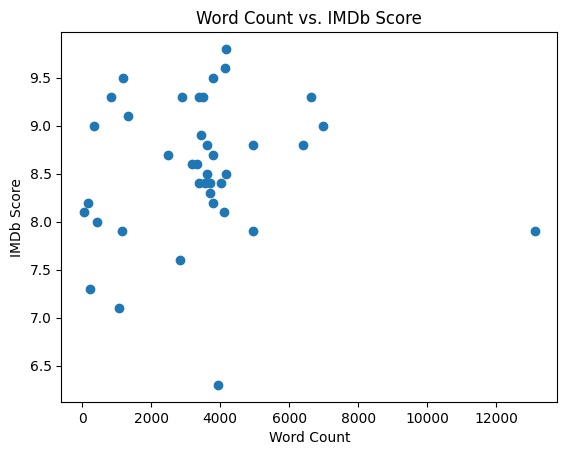

In [13]:
# Non-linear relationships (Scatter plots)
import matplotlib.pyplot as plt
plt.scatter(episode_data['word_count'], episode_data['IMDb score '])
plt.xlabel("Word Count")
plt.ylabel("IMDb Score")
plt.title("Word Count vs. IMDb Score")
plt.show()

In [14]:
# Performance across seasons
season_performance = {}
for season in episode_data['Season No'].unique():
    season_data = episode_data[episode_data['Season No'] == season]
    season_features = season_data.drop(['Season No', 'episode no.', 'dialouge', 'IMDb score '], axis=1)
    season_target = season_data['IMDb score ']

    if len(season_features) > 0:
      season_predictions = gb_model.predict(season_features)
      rmse, r2, mae = evaluate_model(season_predictions, season_target)
      season_performance[season] = {'RMSE': rmse, 'R2': r2, 'MAE': mae}

print("\nPerformance per Season:")
for season, metrics in season_performance.items():
    print(f"Season {season}: RMSE={metrics['RMSE']}, R2={metrics['R2']}, MAE={metrics['MAE']}")


Performance per Season:
Season 1: RMSE=0.2777985254165992, R2=0.5849860218862191, MAE=0.11731238156475281
Season 2: RMSE=0.1893190886666153, R2=0.8808849540260628, MAE=0.05991950488367008
Season 3: RMSE=0.49770382787460604, R2=0.4194317962163233, MAE=0.190579475168312
Season 4: RMSE=0.47453084105888677, R2=0.7326364548753972, MAE=0.2740417309727882
Season 5: RMSE=0.7372263555510481, R2=0.524633207592641, MAE=0.39149131095201684


In [15]:
import numpy
print(numpy.__version__)

1.26.4


In [16]:
import gensim
print(gensim.__version__)

4.3.3


In [17]:
# Part 2
import pandas as pd
import pandas as pd
import numpy as np
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.feature_extraction.text import TfidfVectorizer
from gensim.models import Word2Vec
from nltk.sentiment import SentimentIntensityAnalyzer
from nltk.tokenize import sent_tokenize
from sklearn.decomposition import PCA

# Download necessary NLTK resources
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('vader_lexicon')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [18]:
# Load the CSV file
df = pd.read_csv("rick_n_morty.csv")

# Preprocessing: Aggregate dialogue per episode and calculate word count
episode_dialogue = df.groupby(['Season No', 'episode no.'])['dialouge'].apply(' '.join).reset_index()
episode_scores = df[['Season No', 'episode no.', 'IMDb score ']].drop_duplicates()
episode_data = pd.merge(episode_dialogue, episode_scores, on=['Season No', 'episode no.'], how='left')


In [19]:
# Normalize Text
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def normalize_text(text):
    words = re.findall(r'\w+', text.lower())
    words = [lemmatizer.lemmatize(word) for word in words if word not in stop_words]
    return ' '.join(words)

episode_data['normalized_dialogue'] = episode_data['dialouge'].apply(normalize_text)


In [20]:
# Calculate word count
episode_data['word_count'] = episode_data['normalized_dialogue'].apply(lambda x: len(x.split()))


In [21]:
# TF-IDF Vectorization
vectorizer_tfidf = TfidfVectorizer(max_features=1000, ngram_range=(1, 2))
tfidf_matrix = vectorizer_tfidf.fit_transform(episode_data['normalized_dialogue'])
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=vectorizer_tfidf.get_feature_names_out())
episode_data = pd.concat([episode_data, tfidf_df], axis=1)



In [22]:
# Word2Vec Embeddings
sentences = [doc.split() for doc in episode_data['normalized_dialogue']]
word2vec_model = Word2Vec(sentences, vector_size=100, window=5, min_count=5, workers=4)

def get_episode_embedding(episode_text):
    words = episode_text.split()
    vectors = [word2vec_model.wv[word] for word in words if word in word2vec_model.wv]
    if vectors:
        return np.mean(vectors, axis=0)
    else:
        return np.zeros(100)

embeddings = np.vstack(episode_data['normalized_dialogue'].apply(get_episode_embedding))
embedding_df = pd.DataFrame(embeddings, columns=[f'embedding_{i}' for i in range(100)])



In [23]:
# PCA for Word2Vec Embeddings
n_components = min(embedding_df.shape[0], embedding_df.shape[1])
pca = PCA(n_components=n_components)
pca_embeddings = pca.fit_transform(embedding_df)
pca_embedding_df = pd.DataFrame(pca_embeddings, columns=[f'pca_embedding_{i}' for i in range(n_components)])
episode_data = pd.concat([episode_data, pca_embedding_df], axis=1)


In [24]:
import nltk
nltk.download ('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [25]:
# Sentiment Analysis
analyzer = SentimentIntensityAnalyzer()
episode_data['sentiment_compound'] = episode_data['dialouge'].apply(lambda x: analyzer.polarity_scores(x)['compound'])
episode_data['sentiment_variance'] = episode_data['dialouge'].apply(lambda x: np.var([analyzer.polarity_scores(s)['compound'] for s in sent_tokenize(x)]))


In [26]:
# Prepare features and target (EXCLUDE scene_changes)
features = episode_data.drop(['Season No', 'episode no.', 'dialouge', 'IMDb score ', 'normalized_dialogue'], axis=1)
target = episode_data['IMDb score ']


In [28]:
print(X_train.dtypes)

word_count              int64
10                    float64
137                   float64
20                    float64
22                    float64
                       ...   
pca_embedding_36      float32
pca_embedding_37      float32
pca_embedding_38      float32
sentiment_compound    float64
sentiment_variance    float64
Length: 1042, dtype: object


In [31]:
# Feature Importance
feature_importance = gb_model.feature_importances_
feature_names = X_train.columns
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importance})
importance_df = importance_df.sort_values(by='Importance', ascending=False)
print("\nFeature Importance:")
print(importance_df.head(20))



Feature Importance:
                 Feature  Importance
206                 dumb    0.408484
32                answer    0.091219
890                 told    0.085281
16                 ahead    0.077187
970                  win    0.049681
1015    pca_embedding_14    0.023606
918                   uh    0.023291
25               alright    0.021493
781                 sigh    0.015023
974                woman    0.014511
238                  eye    0.010158
158                crazy    0.009721
1041  sentiment_variance    0.009402
21                almost    0.008514
164                  cry    0.008450
676                 pull    0.008197
989                 yeah    0.007604
578                 need    0.006158
928                using    0.005886
224                 ever    0.005261


In [32]:
# Correlation Matrix
correlation_matrix = features.corr()
print("\nCorrelation Matrix:")
print(correlation_matrix)


Correlation Matrix:
                    word_count        10       137        20        22  \
word_count            1.000000  0.107349  0.010049  0.091375  0.066154   
10                    0.107349  1.000000 -0.027661  0.229401  0.053532   
137                   0.010049 -0.027661  1.000000 -0.029378 -0.051897   
20                    0.091375  0.229401 -0.029378  1.000000 -0.015271   
22                    0.066154  0.053532 -0.051897 -0.015271  1.000000   
...                        ...       ...       ...       ...       ...   
pca_embedding_36     -0.396922 -0.013614  0.287229 -0.022441 -0.310414   
pca_embedding_37      0.022730 -0.057345 -0.018776  0.373917 -0.128842   
pca_embedding_38      0.168184 -0.037770 -0.044914 -0.449640  0.069257   
sentiment_compound    0.158783 -0.077784  0.171079  0.016670  0.112056   
sentiment_variance    0.128563 -0.084297  0.133971 -0.028406  0.156967   

                         aah      able      acid    across  actually  ...  \
word_count   

In [33]:
# Part 3
import pandas as pd
from nltk.sentiment import SentimentIntensityAnalyzer
from nltk.tokenize import sent_tokenize

In [34]:
analyzer = SentimentIntensityAnalyzer()

def get_overall_sentiment(dialogue):
    sentiment_scores = [analyzer.polarity_scores(s)['compound'] for s in sent_tokenize(dialogue)]
    return pd.Series([
        sum(sentiment_scores) / len(sentiment_scores),  # Average sentiment
        max(sentiment_scores),  # Max sentiment
        min(sentiment_scores),  # Min sentiment
        np.std(sentiment_scores),  # Sentiment standard deviation (fluctuation)
    ], index=['avg_sentiment', 'max_sentiment', 'min_sentiment', 'sentiment_std'])

sentiment_features = episode_data['dialouge'].apply(get_overall_sentiment)
episode_data = pd.concat([episode_data, sentiment_features], axis=1)

print(episode_data[['avg_sentiment', 'max_sentiment', 'min_sentiment', 'sentiment_std', 'IMDb score ']].corr())

               avg_sentiment  max_sentiment  min_sentiment  sentiment_std  \
avg_sentiment       1.000000       0.620835      -0.255766       0.207916   
max_sentiment       0.620835       1.000000      -0.623538       0.683070   
min_sentiment      -0.255766      -0.623538       1.000000      -0.679223   
sentiment_std       0.207916       0.683070      -0.679223       1.000000   
IMDb score          0.103909       0.228678      -0.139976       0.223338   

               IMDb score   
avg_sentiment     0.103909  
max_sentiment     0.228678  
min_sentiment    -0.139976  
sentiment_std     0.223338  
IMDb score        1.000000  


In [35]:
import pandas as pd
import re
from collections import Counter
from nltk.sentiment import SentimentIntensityAnalyzer

# Assuming episode_data is already loaded and processed

analyzer = SentimentIntensityAnalyzer()

In [36]:
# List of important words (from your feature importance results)
important_words = ['dumb', 'told', 'win', 'answer', 'ahead']


In [37]:
# Analyze word combinations
for word1 in important_words:
    for word2 in important_words:
        if word1 != word2:
            combination = f"{word1} {word2}"
            episode_data[combination] = episode_data['dialouge'].apply(lambda x: 1 if re.search(combination, x, re.IGNORECASE) else 0)
            print(f"Correlation for '{combination}':", episode_data[[combination, 'IMDb score ']].corr())


Correlation for 'dumb told':              dumb told  IMDb score 
dumb told          NaN          NaN
IMDb score         NaN          1.0
Correlation for 'dumb win':              dumb win  IMDb score 
dumb win          NaN          NaN
IMDb score        NaN          1.0
Correlation for 'dumb answer':              dumb answer  IMDb score 
dumb answer          NaN          NaN
IMDb score           NaN          1.0
Correlation for 'dumb ahead':              dumb ahead  IMDb score 
dumb ahead          NaN          NaN
IMDb score          NaN          1.0
Correlation for 'told dumb':              told dumb  IMDb score 
told dumb          NaN          NaN
IMDb score         NaN          1.0
Correlation for 'told win':              told win  IMDb score 
told win          NaN          NaN
IMDb score        NaN          1.0
Correlation for 'told answer':              told answer  IMDb score 
told answer          NaN          NaN
IMDb score           NaN          1.0
Correlation for 'told ahead':

In [38]:

# Analyze sentiment/emotional patterns
for word in important_words:
    def get_word_sentiment(dialogue):
        sentences = sent_tokenize(dialogue)
        word_sentences = [s for s in sentences if re.search(word, s, re.IGNORECASE)]
        if word_sentences:
            sentiment_scores = [analyzer.polarity_scores(s)['compound'] for s in word_sentences]
            return sum(sentiment_scores) / len(sentiment_scores)
        else:
            return 0  # No sentiment if word isn't present

    episode_data[f"{word}_sentiment"] = episode_data['dialouge'].apply(get_word_sentiment)
    print(f"Correlation for '{word}_sentiment':", episode_data[[f"{word}_sentiment", 'IMDb score ']].corr())

Correlation for 'dumb_sentiment':                 dumb_sentiment  IMDb score 
dumb_sentiment        1.000000    -0.148385
IMDb score           -0.148385     1.000000
Correlation for 'told_sentiment':                 told_sentiment  IMDb score 
told_sentiment        1.000000     0.161309
IMDb score            0.161309     1.000000
Correlation for 'win_sentiment':                win_sentiment  IMDb score 
win_sentiment       1.000000    -0.203609
IMDb score         -0.203609     1.000000
Correlation for 'answer_sentiment':                   answer_sentiment  IMDb score 
answer_sentiment          1.000000    -0.106124
IMDb score               -0.106124     1.000000
Correlation for 'ahead_sentiment':                  ahead_sentiment  IMDb score 
ahead_sentiment          1.00000     -0.50491
IMDb score              -0.50491      1.00000


In [39]:
# Part 4
import pandas as pd
import numpy as np
import nltk
from nltk.tokenize import sent_tokenize

nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [40]:
def dialogue_length_variation(dialogue):
    sentences = sent_tokenize(dialogue)
    sentence_lengths = [len(sentence.split()) for sentence in sentences]
    if sentence_lengths:
        return np.std(sentence_lengths)
    else:
        return 0

episode_data['dialogue_length_variation'] = episode_data['dialouge'].apply(dialogue_length_variation)

print(episode_data[['dialogue_length_variation', 'IMDb score ']].corr())

                           dialogue_length_variation  IMDb score 
dialogue_length_variation                   1.000000    -0.046479
IMDb score                                 -0.046479     1.000000


In [41]:
# Part 5
import pandas as pd
import re


In [42]:
# Assuming 'df' is your original DataFrame
def count_character_interactions(episode_df, char1, char2):
    """
    Counts the number of times char1 and char2 speak in sequence within an episode.

    Args:
        episode_df: DataFrame containing dialogue for a single episode.
        char1: The first character's name.
        char2: The second character's name.

    Returns:
        The number of interactions between char1 and char2.
    """
    interactions = 0
    speakers = episode_df['speaker'].tolist()
    for i in range(len(speakers) - 1):
        if (speakers[i] == char1 and speakers[i + 1] == char2) or \
           (speakers[i] == char2 and speakers[i + 1] == char1):
            interactions += 1
    return interactions


In [43]:
# Group dialogue by episode
episode_dialogue_df = df.groupby(['Season No', 'Episode', 'episode no.'])['dialouge'].apply(list).reset_index()
episode_speaker_df = df.groupby(['Season No', 'Episode', 'episode no.'])['speaker'].apply(list).reset_index()
episode_df = pd.merge(episode_dialogue_df, episode_speaker_df, on=['Season No', 'Episode', 'episode no.'], how='left')


In [44]:
# Calculate interaction features
episode_df['rick_morty_interactions'] = episode_df.apply(
    lambda row: count_character_interactions(
        df[(df['Season No'] == row['Season No']) & (df['episode no.'] == row['episode no.'])], 'Rick', 'Morty'
    ),
    axis=1
)

episode_df['rick_summer_interactions'] = episode_df.apply(
    lambda row: count_character_interactions(
        df[(df['Season No'] == row['Season No']) & (df['episode no.'] == row['episode no.'])], 'Rick', 'Summer'
    ),
    axis=1
)

episode_df['morty_summer_interactions'] = episode_df.apply(
    lambda row: count_character_interactions(
        df[(df['Season No'] == row['Season No']) & (df['episode no.'] == row['episode no.'])], 'Morty', 'Summer'
    ),
    axis=1
)


In [45]:
# Merge back the interaction features into the main episode_data DataFrame.
episode_data = pd.merge(episode_data, episode_df[['Season No', 'episode no.', 'rick_morty_interactions', 'rick_summer_interactions', 'morty_summer_interactions']], on=['Season No', 'episode no.'], how='left')

print(episode_data[['rick_morty_interactions', 'rick_summer_interactions', 'morty_summer_interactions', 'IMDb score ']].corr())

                           rick_morty_interactions  rick_summer_interactions  \
rick_morty_interactions                   1.000000                  0.182772   
rick_summer_interactions                  0.182772                  1.000000   
morty_summer_interactions                 0.314684                  0.394990   
IMDb score                                0.029714                 -0.159682   

                           morty_summer_interactions  IMDb score   
rick_morty_interactions                     0.314684     0.029714  
rick_summer_interactions                    0.394990    -0.159682  
morty_summer_interactions                   1.000000    -0.189655  
IMDb score                                 -0.189655     1.000000  


In [46]:
# Part 6 Visuals
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.ensemble import GradientBoostingRegressor  # Import the model
from sklearn.model_selection import train_test_split #Import the train test split

# Assuming 'episode_data' is your DataFrame with all the features and IMDb scores


In [47]:
# 1. Feature Importance Bar Chart (Top 10)
def plot_feature_importance(importance_df, top_n=10):
    """Plots the top N feature importances."""
    print("Inside plot_feature_importance function...")  # Debugging print
    print(importance_df.head())  # Print the first few rows of importance_df
    print(importance_df.columns)  # Print the columns of importance_df
    plt.figure(figsize=(10, 6))
    top_importance = importance_df.head(top_n)
    sns.barplot(x='Importance', y='Feature', data=top_importance, palette='viridis')
    plt.title(f'Top {top_n} Feature Importance')
    plt.xlabel('Importance Score')
    plt.ylabel('Feature')
    plt.tight_layout()
    plt.show()

Inside plot_feature_importance function...
    Feature  Importance
206    dumb    0.408484
32   answer    0.091219
890    told    0.085281
16    ahead    0.077187
970     win    0.049681
Index(['Feature', 'Importance'], dtype='object')


<ipython-input-47-527ccbd2be8b>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=top_importance, palette='viridis')


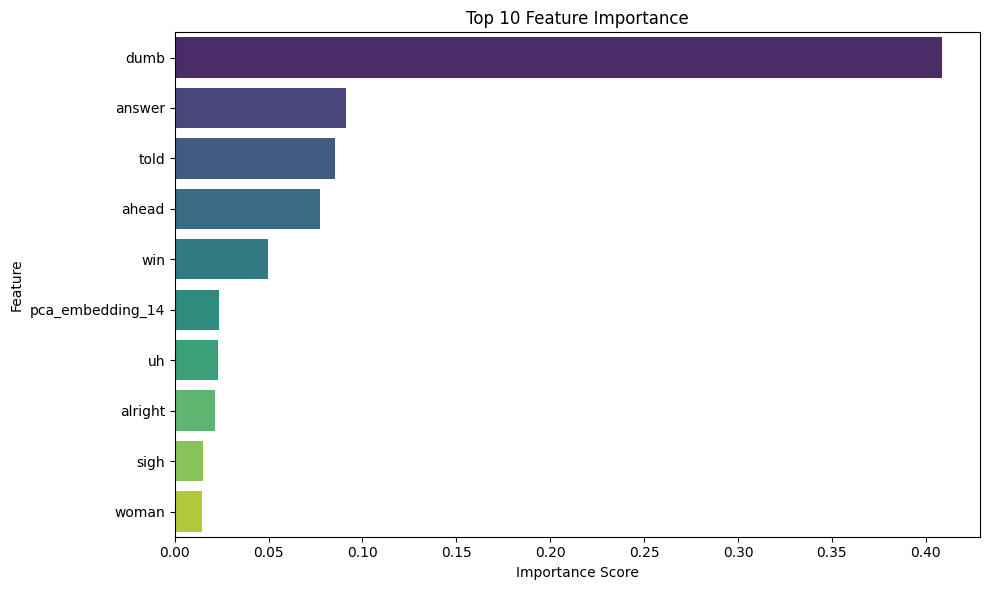

In [48]:
plot_feature_importance(importance_df)

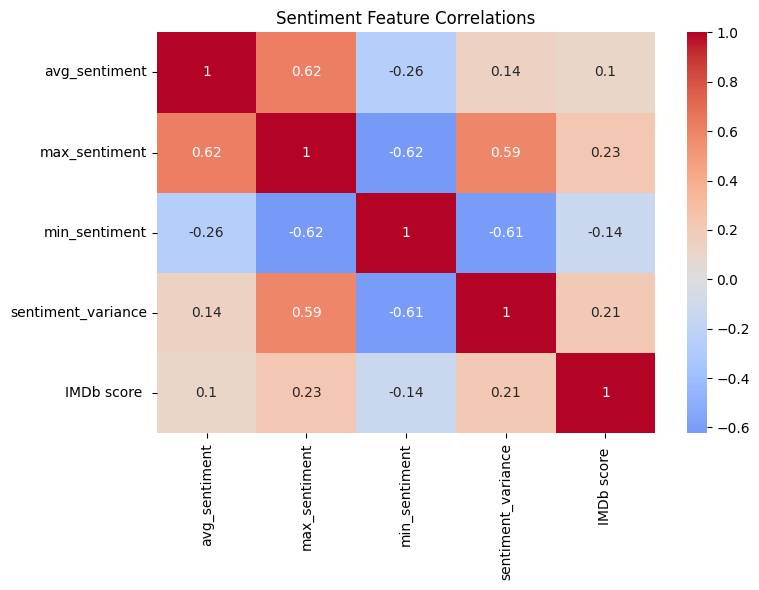

In [49]:
# 2. Sentiment Correlation Heatmap
def plot_sentiment_correlation(data):
    """Plots a heatmap of correlations between sentiment features and IMDb score."""
    sentiment_cols = ['avg_sentiment', 'max_sentiment', 'min_sentiment', 'sentiment_variance', 'IMDb score ']
    sentiment_corr = data[sentiment_cols].corr()
    plt.figure(figsize=(8, 6))
    sns.heatmap(sentiment_corr, annot=True, cmap='coolwarm', center=0)
    plt.title('Sentiment Feature Correlations')
    plt.tight_layout()
    plt.show()

plot_sentiment_correlation(episode_data)

In [50]:
# Create the top_words list from importance_df
top_words = importance_df['Feature'].tolist()

In [71]:
# 5. Top Words Correlation
def plot_top_words_corr(episode_data, top_words, n_words=5):
    """Plots the correlation between top words and IMDb score."""
    plt.figure(figsize=(10, 6))

    # Ensure top_words are in episode_data
    valid_top_words = [word for word in top_words if word in episode_data.columns]
    if not valid_top_words:
        print("Error: None of the top_words are in episode_data.columns")
        return

    scaler = MinMaxScaler()
    scaled_data = scaler.fit_transform(episode_data[valid_top_words[:n_words] + ['IMDb score ']])
    corr_matrix = np.corrcoef(scaled_data.T)
    sns.heatmap(
        corr_matrix,
        annot=True,
        cmap='coolwarm',
        center=0,
        xticklabels=valid_top_words[:n_words] + ['IMDb score '],
        yticklabels=valid_top_words[:n_words] + ['IMDb score '],
    )
    plt.title(f'Correlation of Top {n_words} Words with IMDb Score ')
    plt.tight_layout()
    plt.show()


# Example Usage (assuming you have 'episode_data' and 'top_words' defined):
plot_top_words_corr(episode_data, top_words)

Error: None of the top_words are in episode_data.columns


<Figure size 1000x600 with 0 Axes>

In [72]:
# 6. Word Count vs. IMDb Score Scatter Plot
def plot_word_count_vs_imdb_score(data):
    """Plots a scatter plot of word count vs. IMDb score."""
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x='word_count', y='IMDb score ', data=data, alpha=0.7)
    plt.title('Word Count vs. IMDb Rating')
    plt.xlabel('Word Count')
    plt.ylabel('IMDb Score')
    plt.tight_layout()
    plt.show()

plot_word_count_vs_imdb_score(episode_data)

ValueError: Could not interpret value `word_count` for `x`. An entry with this name does not appear in `data`.

<Figure size 800x600 with 0 Axes>

In [73]:
# 7. IMDb Score by Word Count Quartile Boxplot
def plot_imdb_score_by_word_count_quartile(data):
    """Plots a boxplot to compare IMDb scores across quartiles of word count."""

    # Calculate quartiles of word_count
    data['word_count_quartile'] = pd.qcut(data['word_count'], q=4, labels=['Q1', 'Q2', 'Q3', 'Q4'])

    plt.figure(figsize=(8, 6))
    sns.boxplot(x='word_count_quartile', y='IMDb score ', data=data)
    plt.title('IMDb Score by Word Count Quartile')
    plt.xlabel('Word Count Quartile')
    plt.ylabel('IMDb Score')
    plt.tight_layout()
    plt.show()

plot_imdb_score_by_word_count_quartile(episode_data)

KeyError: 'word_count'

In [74]:
# Part 7
import pandas as pd
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from collections import Counter

# Assuming 'episode_data' is your DataFrame with 'normalized_dialogue' and IMDb score

# 1. Word Frequency
def get_word_frequency(text):
    words = re.findall(r'\w+', text)
    return Counter(words)

episode_data['word_frequency'] = episode_data['normalized_dialogue'].apply(get_word_frequency)


In [55]:
# 2. TF-IDF
vectorizer_tfidf = TfidfVectorizer(max_features=1000, stop_words='english', ngram_range=(1, 2))
tfidf_matrix = vectorizer_tfidf.fit_transform(episode_data['normalized_dialogue'])
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=vectorizer_tfidf.get_feature_names_out())
episode_data = pd.concat([episode_data, tfidf_df], axis=1)


In [56]:
# 3. Analyze Relationship with IMDb
# Example: Correlation of specific words with IMDb score
print("\nCorrelation of TF-IDF words with IMDb score:")
print(episode_data[vectorizer_tfidf.get_feature_names_out().tolist() + ['IMDb score ']].corr()['IMDb score '].sort_values(ascending=False).head(10))



Correlation of TF-IDF words with IMDb score:
IMDb score     1.000000
true           0.435453
true           0.435170
rick           0.422012
rick           0.420521
citadel        0.394926
citadel        0.394076
hurt           0.384290
long           0.382765
hurt           0.382642
Name: IMDb score , dtype: float64


In [58]:
# Part 8
import pandas as pd
import numpy as np
import nltk
from nltk import pos_tag
from nltk.tokenize import word_tokenize, sent_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation, NMF
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import spacy
from collections import Counter
import re

In [59]:
# Load necessary NLTK resources and spaCy model
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nlp = spacy.load("en_core_web_sm")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


In [60]:
episode_data = pd.read_csv("rick_n_morty.csv")

In [61]:
# Preprocessing: Aggregate dialogue per episode and calculate word count
episode_dialogue = df.groupby(['Season No', 'episode no.'])['dialouge'].apply(' '.join).reset_index()
episode_scores = df[['Season No', 'episode no.', 'IMDb score ']].drop_duplicates()
episode_data = pd.merge(episode_dialogue, episode_scores, on=['Season No', 'episode no.'], how='left')

# Normalize Text
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def normalize_text(text):
    words = re.findall(r'\w+', text.lower())
    words = [lemmatizer.lemmatize(word) for word in words if word not in stop_words]
    return ' '.join(words)

episode_data['normalized_dialogue'] = episode_data['dialouge'].apply(normalize_text)


In [62]:
# --- Topic Modeling (LDA and NMF) ---
def get_topics(texts, n_topics=5, n_top_words=5):
    """Performs LDA and NMF topic modeling."""
    vectorizer = TfidfVectorizer(max_features=1000, stop_words='english')
    tfidf_matrix = vectorizer.fit_transform(texts)
    feature_names = vectorizer.get_feature_names_out()

    lda = LatentDirichletAllocation(n_components=n_topics, random_state=42)
    lda.fit(tfidf_matrix)

    nmf = NMF(n_components=n_topics, random_state=42)
    nmf.fit(tfidf_matrix)

    def display_topics(model, feature_names, no_top_words):
        topic_words = []
        for topic_idx, topic in enumerate(model.components_):
            top_features_ind = topic.argsort()[:-no_top_words - 1:-1]
            top_features = [feature_names[i] for i in top_features_ind]
            topic_words.append(top_features)
        return topic_words

    lda_topics = display_topics(lda, feature_names, n_top_words)
    nmf_topics = display_topics(nmf, feature_names, n_top_words)

    lda_topic_distributions = lda.transform(tfidf_matrix)
    nmf_topic_distributions = nmf.transform(tfidf_matrix)

    lda_topic_df = pd.DataFrame(lda_topic_distributions, columns=[f"lda_topic_{i}" for i in range(n_topics)])
    nmf_topic_df = pd.DataFrame(nmf_topic_distributions, columns=[f"nmf_topic_{i}" for i in range(n_topics)])

    return lda_topic_df, nmf_topic_df, lda, vectorizer

lda_topic_df, nmf_topic_df, lda, vectorizer = get_topics(episode_data['normalized_dialogue']) #capture lda and vectorizer.
episode_data = pd.concat([episode_data, lda_topic_df, nmf_topic_df], axis=1)


In [63]:
# --- Named Entity Recognition (NER) ---
def get_entity_counts(text):
    """Extracts and counts named entities."""
    doc = nlp(text)
    entity_counts = Counter([ent.label_ for ent in doc.ents])
    return entity_counts

episode_data['entity_counts'] = episode_data['dialouge'].apply(get_entity_counts)


In [64]:
# Expand entity counts into separate columns
entity_labels = set()
for counts in episode_data['entity_counts']:
    entity_labels.update(counts.keys())

for label in entity_labels:
    episode_data[f'entity_{label}'] = episode_data['entity_counts'].apply(lambda x: x.get(label, 0))


In [65]:
import nltk
nltk.download('averaged_perceptron_tagger_eng')

[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger_eng.zip.


True

In [66]:
# --- Part-of-Speech (POS) Tagging ---
def get_pos_counts(text):
    """Counts POS tags."""
    tokens = word_tokenize(text)
    pos_tags = pos_tag(tokens)
    pos_counts = Counter([tag[1] for tag in pos_tags])
    return pos_counts

episode_data['pos_counts'] = episode_data['dialouge'].apply(get_pos_counts)


In [67]:
# Expand POS counts into separate columns
pos_tags_set = set()
for counts in episode_data['pos_counts']:
    pos_tags_set.update(counts.keys())

for tag in pos_tags_set:
    episode_data[f'pos_{tag}'] = episode_data['pos_counts'].apply(lambda x: x.get(tag, 0))


In [68]:
# --- Context around "dumb" ---
def get_context_features(dialogue, target_word="dumb", context_window=5):
    """Extracts context words around 'dumb'."""
    sentences = sent_tokenize(dialogue)
    context_words = []
    for sentence in sentences:
        words = re.findall(r'\w+', sentence.lower())
        if target_word in words:
            target_index = words.index(target_word)
            start = max(0, target_index - context_window)
            end = min(len(words), target_index + context_window + 1)
            context_words.extend(words[start:end])
    return Counter(context_words)

episode_data['dumb_context'] = episode_data['dialouge'].apply(get_context_features)


In [69]:
# Expand context counts into separate columns.
context_words_set = set()
context_dfs = []
for word in context_words_set:
    context_dfs.append(episode_data['dumb_context'].apply(lambda x: x.get(word, 0)).rename(f'dumb_context_{word}'))

episode_data = pd.concat([episode_data] + context_dfs, axis=1)


In [70]:
# --- Prepare and Run Model ---
features = episode_data.drop(['Season No', 'episode no.', 'dialouge', 'IMDb score ', 'normalized_dialogue', 'entity_counts', 'pos_counts', 'dumb_context'], axis=1)
target = episode_data['IMDb score ']

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

gb_model = GradientBoostingRegressor(random_state=42)
gb_model.fit(X_train, y_train)
gb_predictions = gb_model.predict(X_test)

def evaluate_model(predictions, actual):
    rmse = np.sqrt(mean_squared_error(actual, predictions))
    r2 = r2_score(actual, predictions)
    mae = mean_absolute_error(actual, predictions)
    return rmse, r2, mae

gb_rmse, gb_r2, gb_mae = evaluate_model(gb_predictions, y_test)
print("Gradient Boosting: RMSE={}, R2={}, MAE={}".format(gb_rmse, gb_r2, gb_mae))

Gradient Boosting: RMSE=1.2322937233300992, R2=-0.4003899209763766, MAE=0.9689744832403693


In [75]:
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

# Assuming lda_topic_df, episode_data, and vectorizer are available


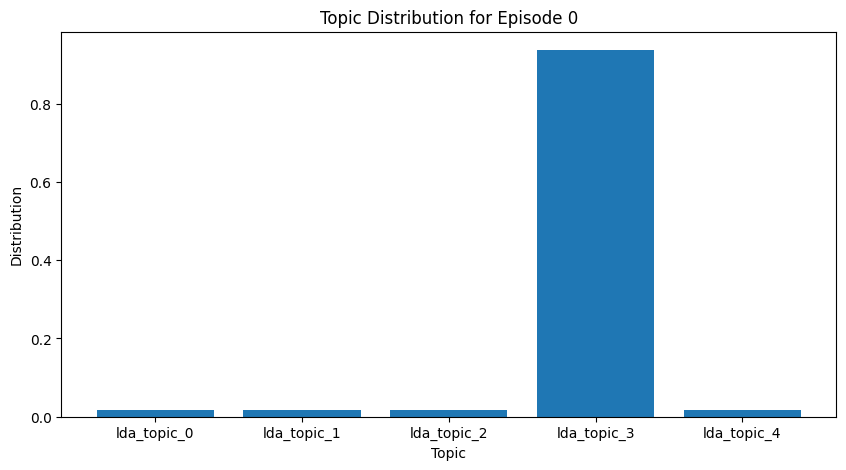

In [76]:
# Bar Plots of Topic Distributions (for a single episode)
episode_index = 0  # Choose an episode index
plt.figure(figsize=(10, 5))
plt.bar(lda_topic_df.columns, lda_topic_df.iloc[episode_index])
plt.title(f"Topic Distribution for Episode {episode_index}")
plt.xlabel("Topic")
plt.ylabel("Distribution")
plt.show()

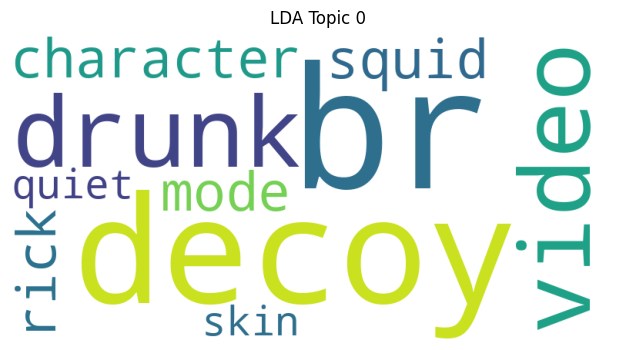

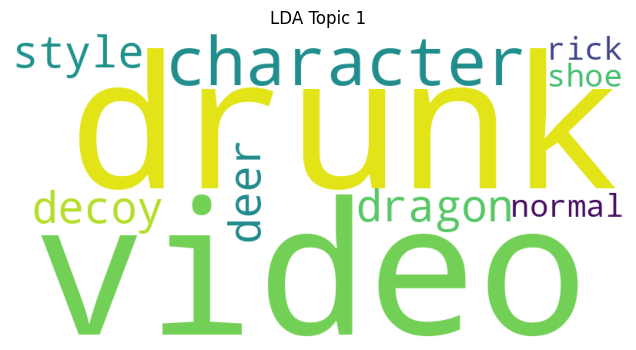

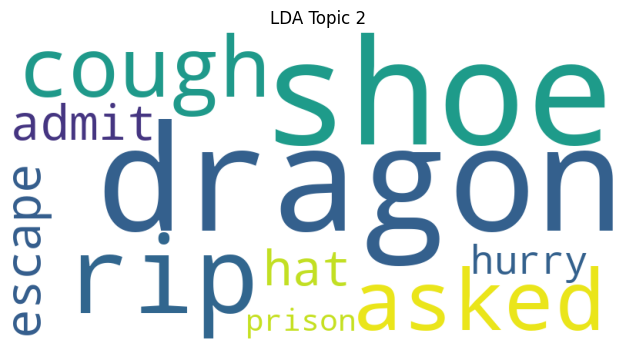

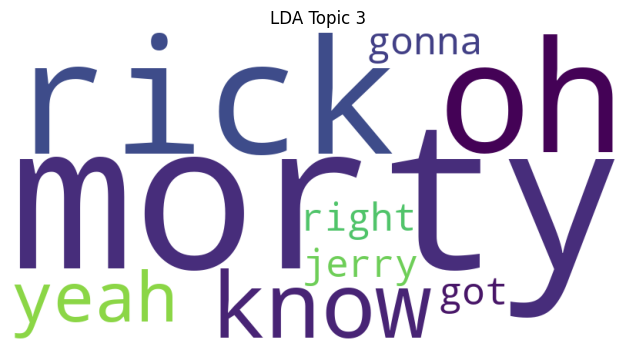

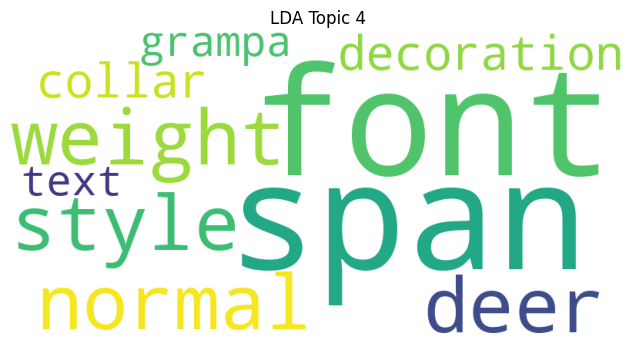

In [77]:
# Word Clouds for Topics
def display_topics(model, feature_names, no_top_words):
    topic_words = []
    for topic_idx, topic in enumerate(model.components_):
        top_features_ind = topic.argsort()[:-no_top_words - 1:-1]
        top_features = [feature_names[i] for i in top_features_ind]
        topic_words.append(top_features)
    return topic_words

lda_topics = display_topics(lda, vectorizer.get_feature_names_out(), 10) #Change the number of words if you want.
for topic_idx, topic in enumerate(lda_topics):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(topic))
    plt.figure(figsize=(8, 4))
    plt.imshow(wordcloud)
    plt.title(f"LDA Topic {topic_idx}")
    plt.axis('off')
    plt.show()


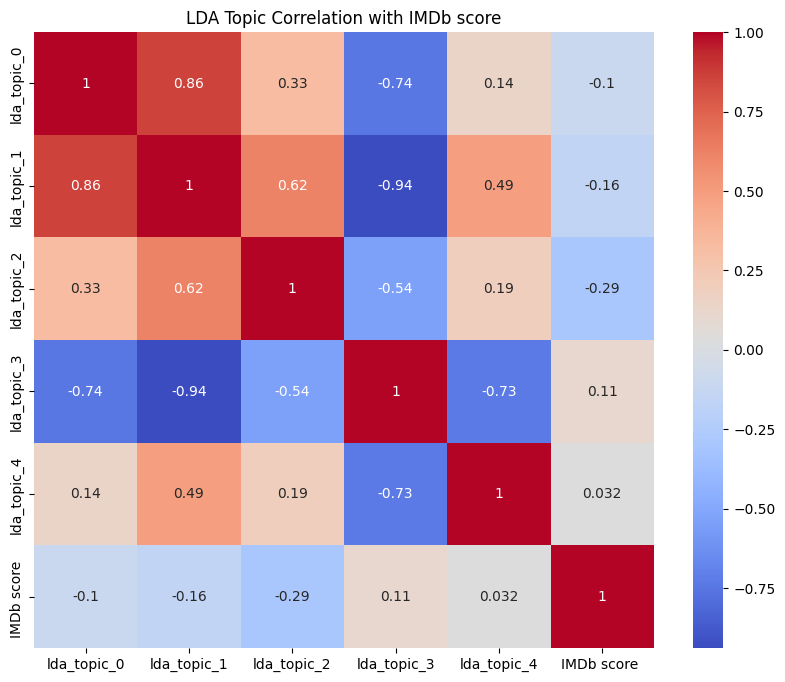

In [78]:
#Correlation heatmap for LDA topics and score.
lda_corr = pd.concat([lda_topic_df, episode_data['IMDb score ']], axis=1).corr()
plt.figure(figsize=(10,8))
sns.heatmap(lda_corr, annot = True, cmap = 'coolwarm')
plt.title("LDA Topic Correlation with IMDb score")
plt.show()

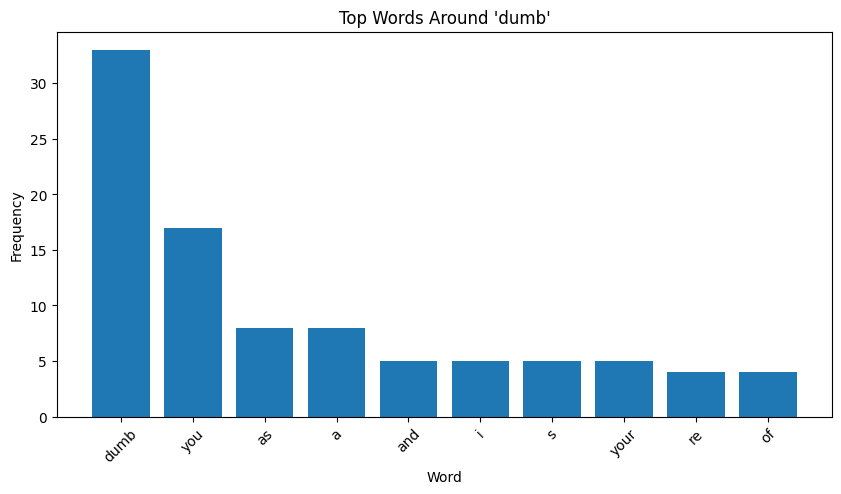

In [79]:
# Bar Plot of Context Word Frequencies
context_word_counts = episode_data['dumb_context'].sum()
top_context_words = context_word_counts.most_common(10)  # Top 10 words
words, counts = zip(*top_context_words)

plt.figure(figsize=(10, 5))
plt.bar(words, counts)
plt.title("Top Words Around 'dumb'")
plt.xlabel("Word")
plt.ylabel("Frequency")
plt.xticks(rotation=45)
plt.show()

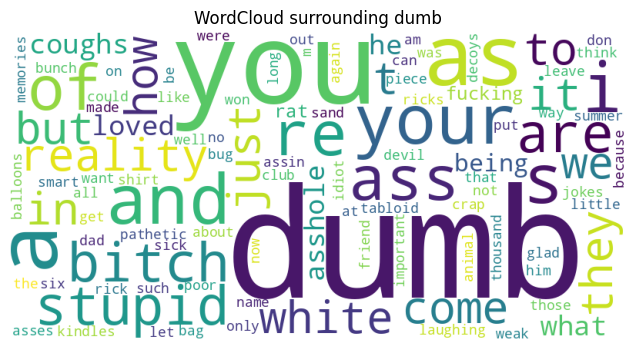

In [80]:
#Wordcloud of context words.
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(context_word_counts)
plt.figure(figsize=(8,4))
plt.imshow(wordcloud)
plt.title("WordCloud surrounding dumb")
plt.axis('off')
plt.show()

In [81]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming episode_data is already defined and entity_counts is calculated

# NER Entity Counts Visualization
entity_counts_df = episode_data[[col for col in episode_data.columns if col.startswith('entity_')]]


In [82]:
# Exclude the 'entity_counts' column if it exists
if 'entity_counts' in entity_counts_df.columns:
    entity_counts_df = entity_counts_df.drop(columns=['entity_counts'])

# Sum the counts for each entity type across all episodes.
entity_sums = entity_counts_df.sum()  # Directly sum the columns


In [83]:
# Extract entity labels and counts for plotting
entity_labels = list(entity_sums.index)  # Use .index for labels
entity_values = list(entity_sums.values)  # Use .values for counts


In [84]:
# Check the data types of the variables
print("Type of entity_labels:", type(entity_labels))
if entity_labels:
    print("Type of elements in entity_labels:", type(entity_labels[0]))
print("Type of entity_values:", type(entity_values))
if entity_values:
    print("Type of elements in entity_values:", type(entity_values[0]))


Type of entity_labels: <class 'list'>
Type of elements in entity_labels: <class 'str'>
Type of entity_values: <class 'list'>
Type of elements in entity_values: <class 'numpy.int64'>


In [85]:
# Check the values in the variables
print("First 10 elements of entity_labels:", entity_labels[:10])
print("First 10 elements of entity_values:", entity_values[:10])


First 10 elements of entity_labels: ['entity_LOC', 'entity_ORG', 'entity_EVENT', 'entity_PRODUCT', 'entity_WORK_OF_ART', 'entity_LANGUAGE', 'entity_DATE', 'entity_CARDINAL', 'entity_LAW', 'entity_MONEY']
First 10 elements of entity_values: [76, 468, 6, 111, 66, 5, 386, 543, 2, 25]


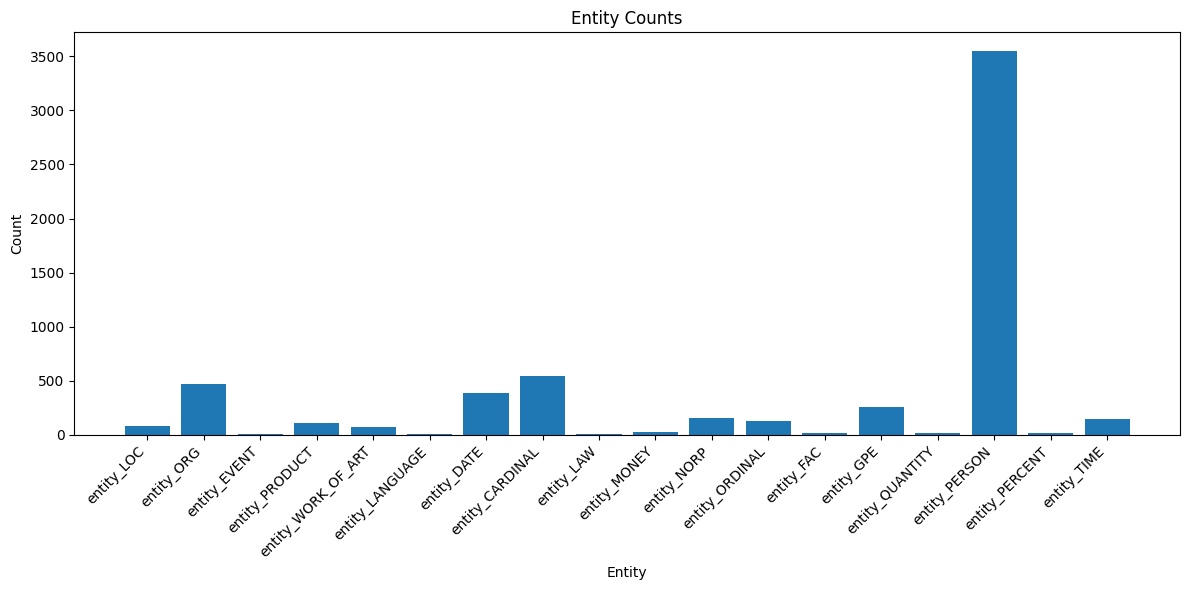

In [86]:
plt.figure(figsize=(12, 6))
plt.bar(entity_labels, entity_values)
plt.title("Entity Counts")
plt.xlabel("Entity")
plt.ylabel("Count")
plt.xticks(rotation=45, ha='right')  # Rotate labels for better readability
plt.tight_layout()  # prevents labels from being cut off.
plt.show()

In [87]:
import matplotlib.pyplot as plt

In [88]:
print(episode_data.columns)

Index(['Season No', 'episode no.', 'dialouge', 'IMDb score ',
       'normalized_dialogue', 'lda_topic_0', 'lda_topic_1', 'lda_topic_2',
       'lda_topic_3', 'lda_topic_4', 'nmf_topic_0', 'nmf_topic_1',
       'nmf_topic_2', 'nmf_topic_3', 'nmf_topic_4', 'entity_counts',
       'entity_LOC', 'entity_ORG', 'entity_EVENT', 'entity_PRODUCT',
       'entity_WORK_OF_ART', 'entity_LANGUAGE', 'entity_DATE',
       'entity_CARDINAL', 'entity_LAW', 'entity_MONEY', 'entity_NORP',
       'entity_ORDINAL', 'entity_FAC', 'entity_GPE', 'entity_QUANTITY',
       'entity_PERSON', 'entity_PERCENT', 'entity_TIME', 'pos_counts',
       'pos_VB', 'pos_VBZ', 'pos_NNPS', 'pos_$', 'pos_NN', 'pos_WRB', 'pos_MD',
       'pos_JJR', 'pos_CC', 'pos_JJ', 'pos_FW', 'pos_WP$', 'pos_CD', 'pos_(',
       'pos_POS', 'pos_VBP', 'pos_''', 'pos_VBN', 'pos_DT', 'pos_RBR',
       'pos_PRP', 'pos_:', 'pos_VBG', 'pos_EX', 'pos_NNS', 'pos_WDT', 'pos_)',
       'pos_RB', 'pos_.', 'pos_PRP$', 'pos_VBD', 'pos_``', 'pos_JJS',
   

In [89]:
episode_data['word_count'] = episode_data['normalized_dialogue'].apply(lambda x: len(x.split()))

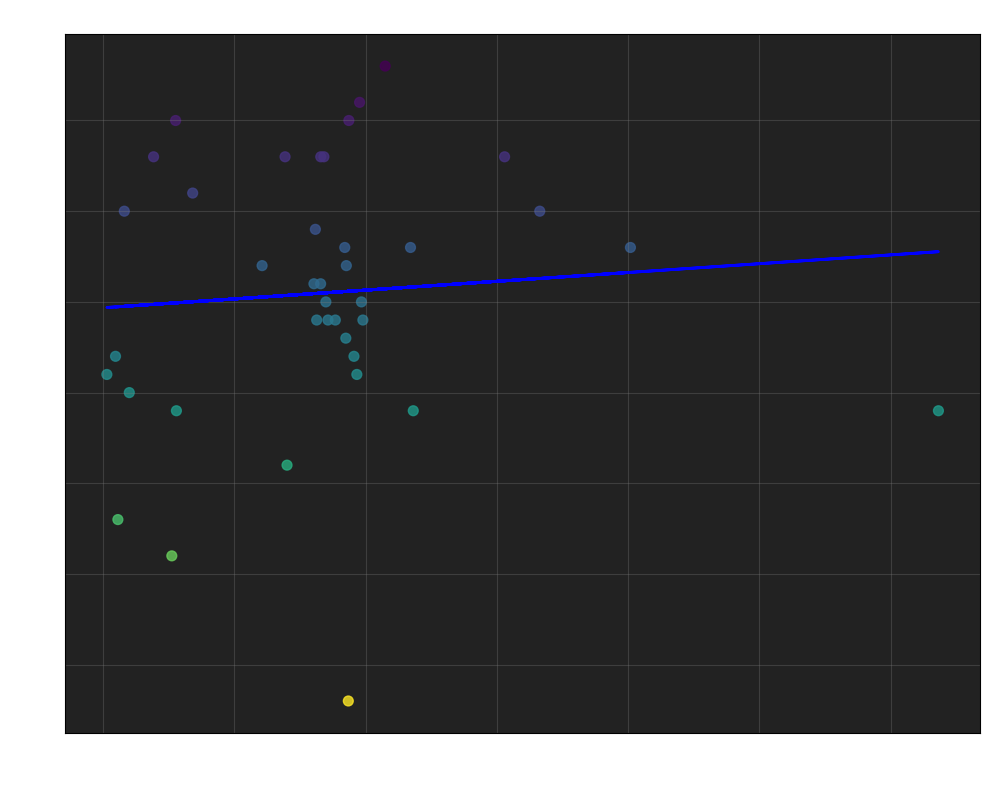

In [90]:

# Ensure 'word_count' exists (and duplicates are handled)
if 'word_count' in episode_data.columns:
    # Rick and Morty Themed Scatter Plot
    plt.figure(figsize=(10, 8))  # Slightly larger figure for better readability
    plt.scatter(episode_data['word_count'], episode_data['IMDb score '],
                c=episode_data['IMDb score '], cmap='viridis_r',
                s=50, alpha=0.8)
    # Add regression line
    z = np.polyfit(episode_data['word_count'], episode_data['IMDb score '], 1)
    p = np.poly1d(z)
    plt.plot(episode_data['word_count'], p(episode_data['word_count']), "b-",
             linewidth=2)

    # **Descriptive Titles and Labels**
    plt.title("IMDb Score vs. Word Count in Rick and Morty Episodes",
              color='#ffffff', fontsize=16)  # More specific title (explicit white)
    plt.xlabel("Word Count (Number of Words in Episode Dialogue)",
               color='#ffffff', fontsize=12)  # More descriptive x-label (explicit white)
    plt.ylabel("IMDb Score", color='#ffffff', fontsize=12)  # Clear y-label (explicit white)
    plt.grid(True, color='gray', alpha=0.3)
    plt.gca().set_facecolor('#222222')
    plt.gca().tick_params(axis='x', colors='#ffffff')  # Explicit white ticks
    plt.gca().tick_params(axis='y', colors='#ffffff')  # Explicit white ticks

    plt.tight_layout()  # Adjust layout to prevent labels from overlapping
    plt.savefig("imdb_word_count_scatterplot.png", dpi=300,
                bbox_inches='tight')  # Save the plot
    plt.show()
else:
    print("Error: 'word_count' column not found.")

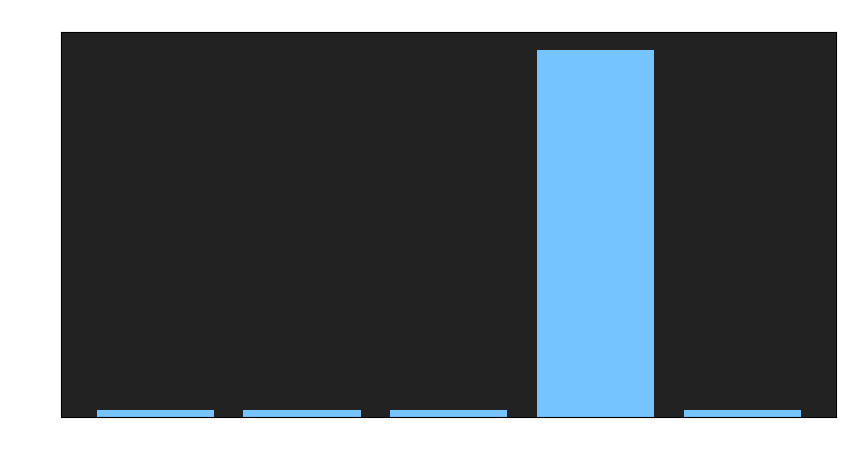

In [91]:
# LDA Topic Distributions (for a single episode)
episode_index = 0  # Choose an episode index
plt.figure(figsize=(10, 5))
plt.bar(lda_topic_df.columns, lda_topic_df.iloc[episode_index], color='#76c4ff')  # Blue color
plt.title(f"Topic Distribution for Episode {episode_index}", color='#ffffff')
plt.xlabel("Topic", color='#ffffff')
plt.ylabel("Distribution", color='#ffffff')
plt.gca().set_facecolor('#222222')
plt.gca().tick_params(axis='x', colors='#ffffff')
plt.gca().tick_params(axis='y', colors='#ffffff')
plt.show()

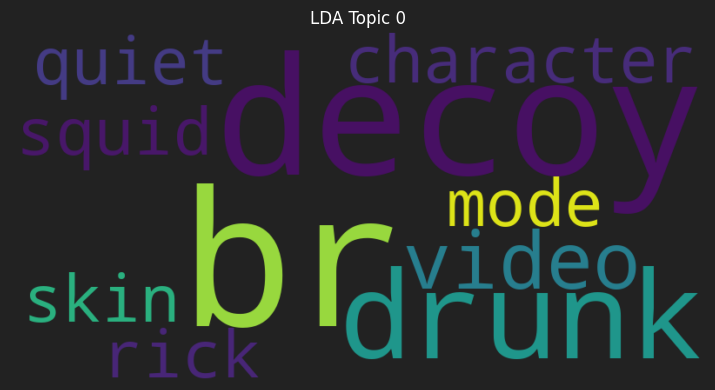

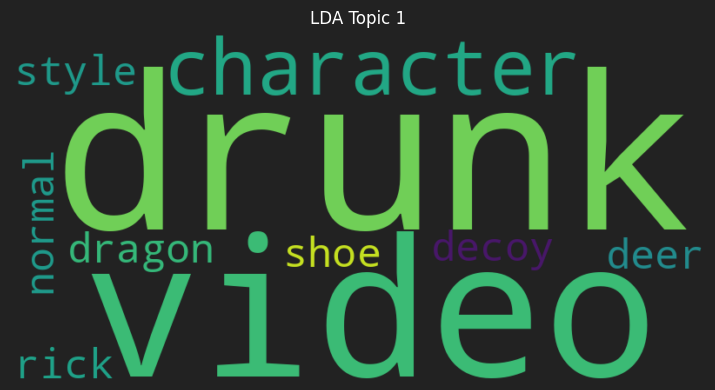

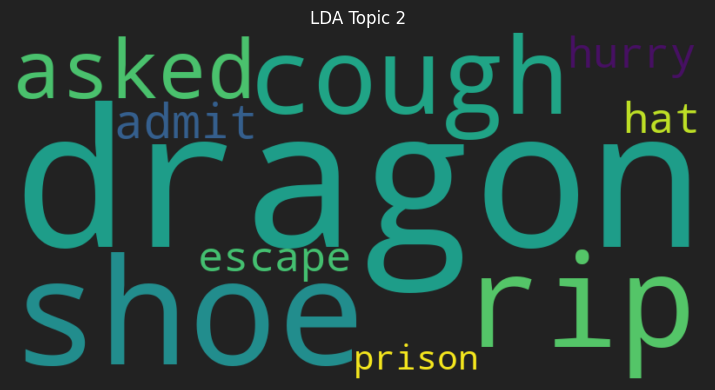

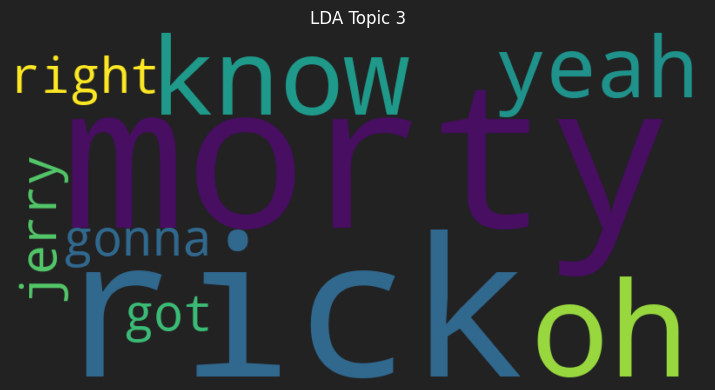

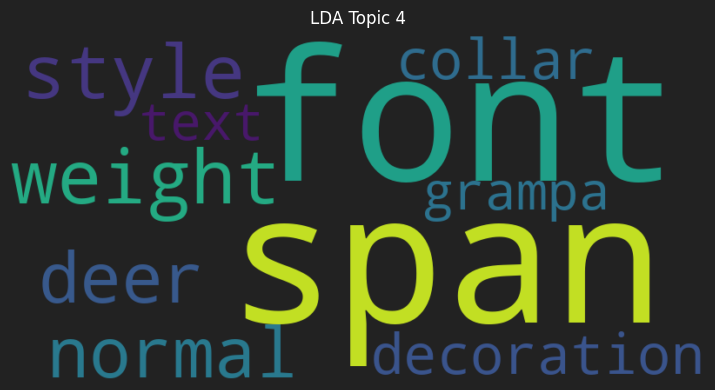

In [92]:
# Word Clouds for Topics
def display_topics(model, feature_names, no_top_words):
    topic_words = []
    for topic_idx, topic in enumerate(model.components_):
        top_features_ind = topic.argsort()[:-no_top_words - 1:-1]
        top_features = [feature_names[i] for i in top_features_ind]
        topic_words.append(top_features)
    return topic_words

lda_topics = display_topics(lda, vectorizer.get_feature_names_out(), 10)
for topic_idx, topic in enumerate(lda_topics):
    wordcloud = WordCloud(width=800, height=400, background_color='#222222',
                        colormap='viridis_r').generate(' '.join(topic))  # Dark background, green-yellow
    plt.figure(figsize=(8, 4), facecolor='#222222')  # Dark figure facecolor
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f"LDA Topic {topic_idx}", color='#ffffff')
    plt.axis('off')
    plt.tight_layout()
    plt.show()

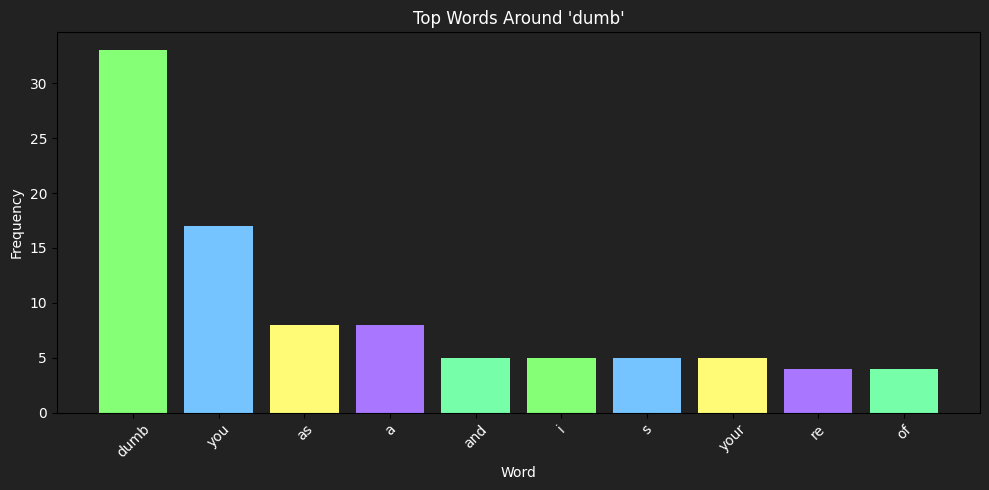

In [93]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming episode_data and 'dumb_context' are already defined

# Bar Plot of Context Word Frequencies
context_word_counts = episode_data['dumb_context'].sum()
top_context_words = context_word_counts.most_common(10)  # Top 10 words
words, counts = zip(*top_context_words)

# Define a color palette
color_palette = ['#84ff76',  # Bright Green
                 '#76c4ff',  # Bright Blue
                 '#fffb76',  # Bright Yellow
                 '#a876ff',  # Bright Purple (added for variation)
                 '#76ffa8']  # Light Green Blue (added for variation)

# Extend or repeat the color palette to match the number of words
num_words = len(words)
if num_words > len(color_palette):
    color_palette = color_palette * (num_words // len(color_palette)) + color_palette[:num_words % len(color_palette)]

plt.figure(figsize=(10, 5), facecolor='#222222')  # Dark figure facecolor
plt.bar(words, counts, color=color_palette)  # Apply the color palette
plt.title("Top Words Around 'dumb'", color='#ffffff')
plt.xlabel("Word", color='#ffffff')
plt.ylabel("Frequency", color='#ffffff')
plt.xticks(rotation=45, color='#ffffff')
plt.yticks(color='#ffffff')
plt.gca().set_facecolor('#222222')
plt.tight_layout()
plt.show()

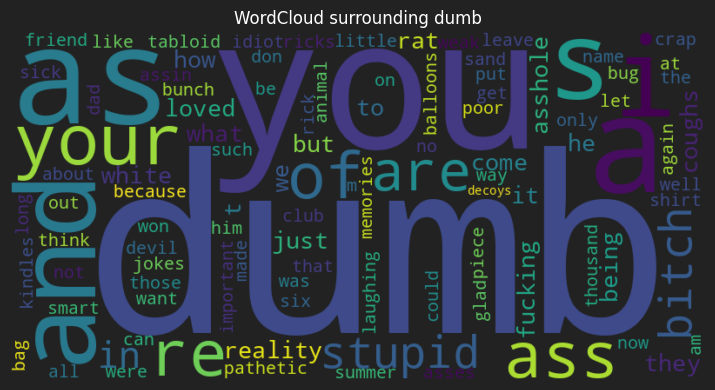

In [94]:
# Wordcloud of context words.
wordcloud = WordCloud(width=800, height=400, background_color='#222222',
                    colormap='viridis_r').generate_from_frequencies(context_word_counts)  # Dark background, green-yellow
plt.figure(figsize=(8, 4), facecolor='#222222')  # Dark figure facecolor
plt.imshow(wordcloud, interpolation='bilinear')
plt.title("WordCloud surrounding dumb", color='#ffffff')
plt.axis('off')
plt.tight_layout()
plt.show()

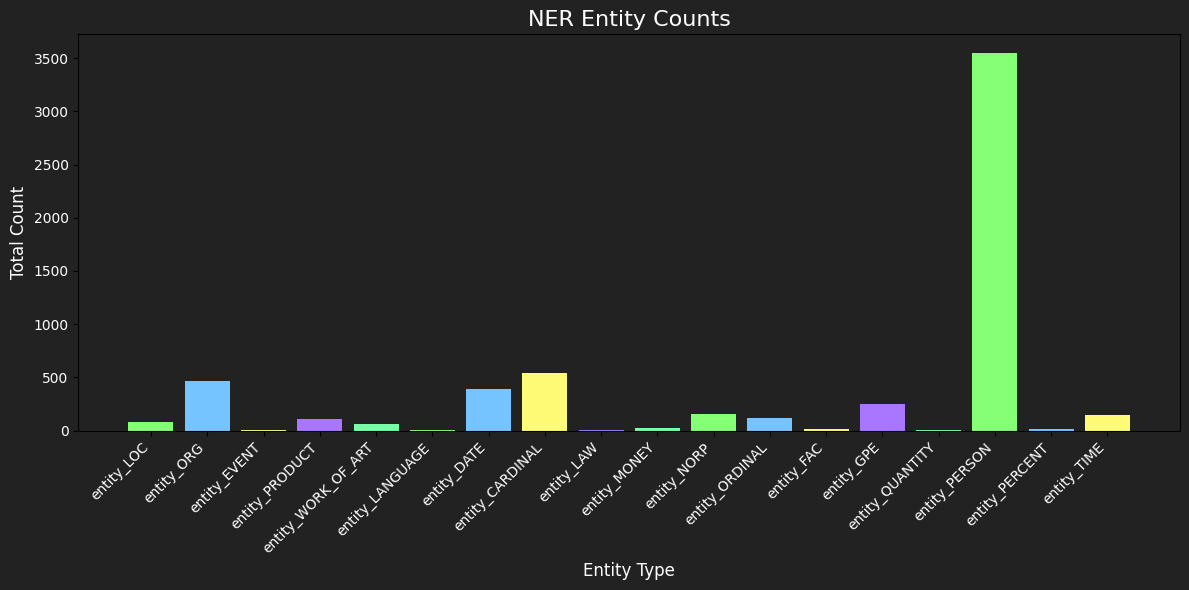

In [95]:
# NER Entity Counts Visualization
entity_counts_df = episode_data[[col for col in episode_data.columns if col.startswith('entity_')]]

# Exclude the 'entity_counts' column if it exists
if 'entity_counts' in entity_counts_df.columns:
    entity_counts_df = entity_counts_df.drop(columns=['entity_counts'])

# Sum the counts for each entity type across all episodes.
entity_sums = entity_counts_df.sum()

# Extract entity labels and counts for plotting
entity_labels = list(entity_sums.index)
entity_values = list(entity_sums.values)

# Define a color palette
color_palette = ['#84ff76',  # Bright Green
                 '#76c4ff',  # Bright Blue
                 '#fffb76',  # Bright Yellow
                 '#a876ff',  # Bright Purple (added for variation)
                 '#76ffa8']  # Light Green Blue (added for variation)

# Extend or repeat the color palette to match the number of entities
num_entities = len(entity_labels)
if num_entities > len(color_palette):
    color_palette = color_palette * (num_entities // len(color_palette)) + color_palette[:num_entities % len(color_palette)]

# Visualization
plt.figure(figsize=(12, 6), facecolor='#222222')  # Dark figure facecolor
plt.bar(entity_labels, entity_values, color=color_palette)  # Apply the color palette
plt.title("NER Entity Counts", color='#ffffff', fontsize=16)  # More specific title
plt.xlabel("Entity Type", color='#ffffff', fontsize=12)  # More descriptive x-label
plt.ylabel("Total Count", color='#ffffff', fontsize=12)  # Clear y-label
plt.xticks(rotation=45, ha='right', color='#ffffff')
plt.yticks(color='#ffffff')
plt.gca().set_facecolor('#222222')
plt.tight_layout()
plt.show()

In [96]:
import matplotlib.pyplot as plt

# Assuming you have 'word_counts' and 'imdb_scores' lists/arrays
plt.figure(figsize=(10, 6), facecolor='#222222') # Set figure facecolor

plt.scatter(word_counts, imdb_scores, c=imdb_scores, cmap='viridis', alpha=0.7)


NameError: name 'word_counts' is not defined

<Figure size 1000x600 with 0 Axes>

In [97]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_feature_importance(importance_df, top_n=10):
    """Plots the top N feature importances with Rick and Morty theme."""
    print("Inside plot_feature_importance function...")
    print(importance_df.head())
    print(importance_df.columns)

    # Rick and Morty Color Palette
    green = '#00BFA5'  # Electric Green/Teal
    purple = '#9C27B0' # Deep Purple/Magenta
    yellow = '#FFEB3B' # Bright Yellow/Gold
    dark_grey = '#222222' # Dark Grey/Black

    plt.figure(figsize=(10, 6), facecolor=dark_grey)  # Dark background

    top_importance = importance_df.head(top_n)

    # Create a list of colors for the bars, cycling through the palette
    colors = [green, purple, yellow] * (top_n // 3) + [green, purple, yellow][:top_n % 3]

    sns.barplot(x='Importance', y='Feature', data=top_importance, palette=colors)

    plt.title(f'Top {top_n} Feature Importance', color=yellow, fontsize=16)
    plt.xlabel('Importance Score', color=green, fontsize=12)
    plt.ylabel('Feature', color=green, fontsize=12)
    plt.xticks(color=yellow)
    plt.yticks(color=yellow)

    # Remove spines and adjust appearance
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)
    plt.gca().spines['left'].set_color(green)
    plt.gca().spines['bottom'].set_color(green)

    plt.tight_layout()
    plt.show()
